# Step 1 Import the Libraries and Read in Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import seaborn as sns
from my_func import *

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [3]:
df = pd.read_csv('../CSV Files/kc_house_data_cleaned.csv')
df.head()
df.loc[df.zipcode == 98023]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
46,210490.0,3,1.00,990,8528,1.0,0.0,3,6,990,0.0,1966,98023,1228,8840
90,243500.0,4,2.50,1980,7403,2.0,0.0,3,7,1980,0.0,1988,98023,1980,7510
92,153000.0,3,1.00,1200,10500,1.0,0.0,3,7,1200,0.0,1962,98023,1350,10500
97,199000.0,4,1.50,1160,6400,1.0,0.0,4,7,1160,0.0,1975,98023,1160,6400
127,260000.0,4,2.25,2160,8811,1.0,0.0,3,8,1360,800.0,1978,98023,2090,8400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21391,330000.0,3,2.50,2238,7209,2.0,0.0,3,8,2238,0.0,2011,98023,2456,7212
21448,380000.0,4,2.50,3120,5001,2.0,0.0,3,9,3120,0.0,2005,98023,3120,5244
21454,249000.0,3,1.00,1030,24750,1.0,0.0,3,5,1030,0.0,1943,98023,2810,28800
21519,332000.0,4,2.50,2380,5737,2.0,0.0,3,7,2380,0.0,2010,98023,2380,5396


In [4]:
df.iloc[46]

price            210490.0
bedrooms              3.0
bathrooms             1.0
sqft_living         990.0
sqft_lot           8528.0
floors                1.0
waterfront            0.0
condition             3.0
grade                 6.0
sqft_above          990.0
sqft_basement         0.0
yr_built           1966.0
zipcode           98023.0
sqft_living15      1228.0
sqft_lot15         8840.0
Name: 46, dtype: float64

# Step 2 Explore the Data

### Step 2.1 Descibe the Data

In [5]:
# get the summary
desc_df = df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)
desc_df.loc['+2_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 2)
desc_df.loc['-2_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 2)

# display it
desc_df.round(2)
#desc_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,3.41,7.66,1788.60,285.72,1971.00,98077.95,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.65,1.17,827.76,439.82,29.38,53.51,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,370.00,0.00,1900.00,98001.00,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1190.00,0.00,1951.00,98033.00,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,0.00,1975.00,98065.00,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,2210.00,550.00,1997.00,98118.00,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,5.00,13.00,9410.00,4820.00,2015.00,98199.00,6210.00,871200.00
+3_std,1642400.99,6.15,4.42,4834.64,139337.32,3.11,0.25,5.36,11.18,4271.88,1605.18,2059.13,98238.49,4042.31,94581.61
-3_std,-561807.85,0.59,-0.19,-674.00,-109138.50,-0.12,-0.24,1.46,4.14,-694.68,-1033.74,1882.87,97917.41,-69.07,-69065.04


#### Analysis

There are a considerable number of outliers in the data that will have an effect on the output of our linear regression models. The extremity of the outliers can be seen by looking at the max value and comparing it to the + or - 3 standard devation value. 

### Step 2.2 Visualize the Data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,True,False,True,True,False,False,False,False,True,True,False,False,False,True,False
bedrooms,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False
bathrooms,True,True,True,True,False,True,False,False,True,True,False,True,False,True,False
sqft_living,True,True,True,True,False,False,False,False,True,True,True,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
floors,False,False,True,False,False,True,False,False,True,True,False,True,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
grade,True,False,True,True,False,True,False,False,True,True,False,True,False,True,False
sqft_above,True,True,True,True,False,True,False,False,True,True,False,True,False,True,False


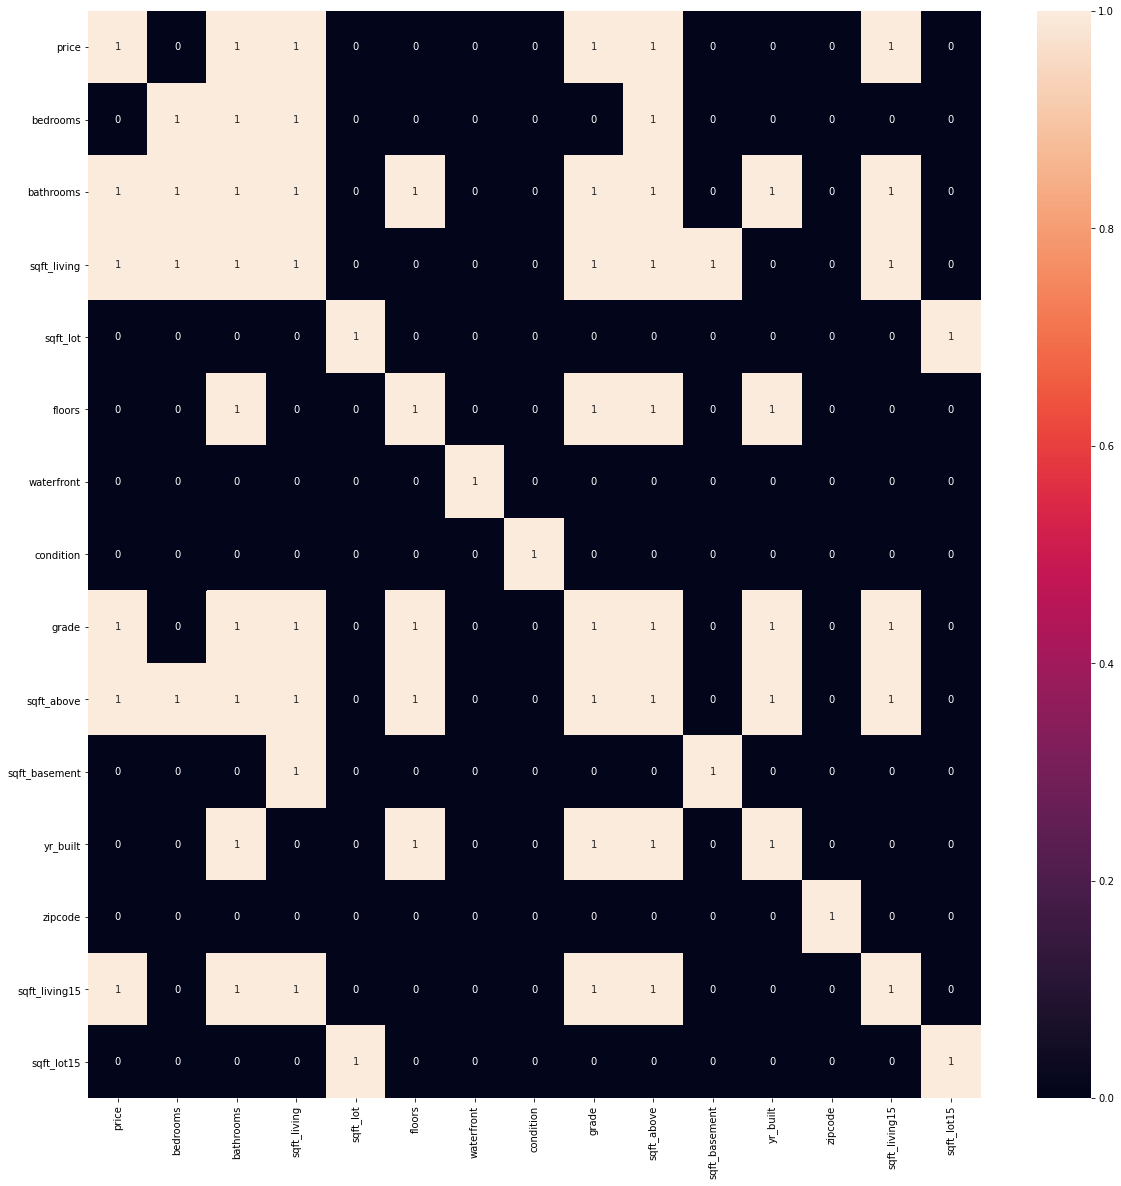

In [11]:
# calculate the correlation matrix
corr = np.abs(df.corr().round(2)) > .4

# display the correlation matrix
plt.figure(figsize=(20,20))
display(corr > .4)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, annot=True)


In [6]:
#easy view to see which values are the highest correlating to our target value of price
corr.price.sort_values(ascending=False)[1:]

sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.53
sqft_basement    0.32
bedrooms         0.31
waterfront       0.26
floors           0.26
sqft_lot         0.09
sqft_lot15       0.08
yr_built         0.05
condition        0.04
zipcode         -0.05
Name: price, dtype: float64

### Scatter Matrix

In [7]:
# define the plot
#pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

### Temmporary/Testing

In [8]:
zipcode_df = df.groupby(['zipcode'])
zipcode_df.std().sort_values(['price'],ascending=False)[:10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
zipcode,,,,,,,,,,,,,,
98039,1.166904e+06,0.890081,1.366509,1764.502500,6655.224175,0.501427,0.141421,0.579937,1.655664,1595.431517,714.842640,25.557650,701.535604,5957.568571
98102,7.903814e+05,1.146967,0.936100,1416.956148,3738.541805,0.535084,0.000000,0.641411,1.283804,1034.478508,496.459644,43.927591,592.328447,1875.940893
98004,7.460941e+05,0.976504,0.950634,1308.368630,6441.120122,0.516475,0.056166,0.619419,1.460538,1140.285874,633.315534,23.533908,743.307049,5294.473819
98040,6.077676e+05,0.859887,0.891947,1183.141017,7197.254905,0.522593,0.193956,0.698840,1.299563,953.751227,710.641063,17.577512,649.553780,3881.485489
98112,5.942232e+05,1.128377,0.907735,1118.442413,3129.238251,0.521722,0.000000,0.765815,1.203783,906.652855,479.411446,37.965448,789.077587,2085.339018
98105,4.778332e+05,1.363296,0.795222,954.336464,3311.876473,0.528048,0.113954,0.765053,1.106246,735.559880,433.979437,30.118715,655.124950,2695.410967
98033,4.628349e+05,0.829328,0.811419,1025.765907,7916.056192,0.492978,0.083140,0.681061,1.343955,917.855218,492.492947,23.145064,625.415000,5995.938413
98109,4.557008e+05,0.957205,0.850967,906.908825,1692.662740,0.621870,0.000000,0.740324,1.122016,683.522161,423.619964,39.750252,568.800743,1276.037972
98006,4.462724e+05,0.863370,0.806651,1170.730518,8772.702828,0.499893,0.089351,0.720451,1.362850,1036.450856,636.470466,16.944946,891.372362,6117.941375


## 2.3 Numerical Data

Text(0.5, 1.0, 'Raw Price Data')

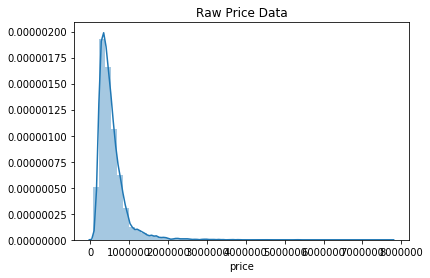

In [9]:
#view distribution of prices
sns.distplot(df.price)
plt.title('Raw Price Data')

Text(0.5, 1.0, 'Raw Living Area Data')

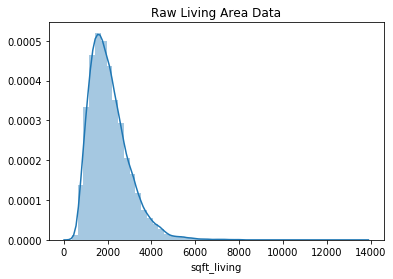

In [10]:
#view distribution of prices
sns.distplot(df.sqft_living)
plt.title('Raw Living Area Data')

### 2.3.1 Removing Extreme Outliers

In [11]:
# filter the data frame to remove the values exceeding 3 standard deviations
# Remove the extreme 0.03% of data
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]


#preserve original df
transformed_df = df

***Note:***<br>
Ended up not removing outliers as this is actual data and can be useful. Can always go back and change here.

Removing outliers will remove several variables such as ['waterfront']. In this case all waterfront values of 1 were removed as they were outliers.

In [12]:
# get the summary
desc_no_outliers_df = df.describe()

# add the standard deviation metric

desc_no_outliers_df.loc['+2_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 2)
desc_no_outliers_df.loc['-2_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 2)

# display it
desc_no_outliers_df.round(2)
#desc_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,20110.00,20110.00,20110.00,20110.00,20110.00,20110.00,20110.00,20110.00,20110.00,20110.00,20110.00,20110.00,20110.00,20110.00,20110.00
mean,492441.80,3.33,2.05,1968.52,10020.72,1.48,0.00,3.41,7.55,1702.08,260.88,1970.54,98079.28,1919.31,9217.27
std,243210.03,0.85,0.69,746.95,11756.84,0.54,0.00,0.64,1.04,706.08,393.78,29.38,53.58,604.87,9138.04
min,82000.00,1.00,0.50,370.00,520.00,1.00,0.00,2.00,5.00,370.00,0.00,1900.00,98001.00,460.00,651.00
25%,315000.00,3.00,1.50,1400.00,5000.00,1.00,0.00,3.00,7.00,1180.00,0.00,1951.00,98033.00,1470.00,5000.00
50%,439054.00,3.00,2.00,1860.00,7400.00,1.00,0.00,3.00,7.00,1520.00,0.00,1974.00,98072.00,1800.00,7471.00
75%,610900.00,4.00,2.50,2430.00,10000.00,2.00,0.00,4.00,8.00,2108.75,510.00,1996.00,98118.00,2280.00,9660.00
max,1640000.00,6.00,4.25,4750.00,137214.00,3.00,0.00,5.00,11.00,4270.00,1600.00,2015.00,98199.00,4042.00,93825.00
+2_std,1275032.85,5.23,3.65,3916.53,97924.68,2.57,0.17,4.71,10.00,3444.12,1165.36,2029.75,98184.98,3357.08,67307.17
-2_std,-194439.71,1.52,0.58,244.11,-67725.86,0.41,-0.16,2.11,5.31,133.08,-593.92,1912.25,97970.93,616.16,-41790.60


### 2.3.2 Address Positive Skew - Price

Text(0.5, 1.0, 'Price Before Log Transform')

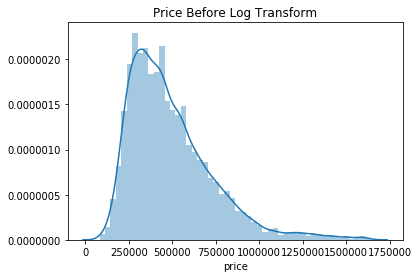

In [13]:
#view distribution of prices
sns.distplot(df.price)
plt.title('Price Before Log Transform')

### 2.3.3 Confirming Skewness and Kurtosis Values for Price

C:\Users\blake\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Price After Log Transform')

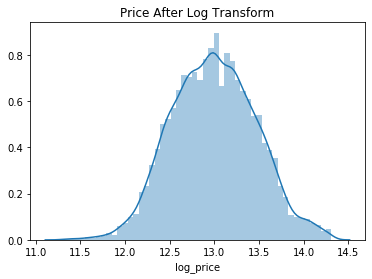

In [14]:
transformed_df['log_price'] = np.log(df.price)
sns.distplot(transformed_df.log_price)
plt.title('Price After Log Transform')

In [15]:
#scipy.stats.skew
print('Raw Price Data Skewness: ',round(skew(df.price),3))
print('Before Price Log Transform Skewness: ',round(skew(transformed_df.price),3))
print('After Price Log Transform Skewness: ',round(skew(transformed_df.log_price),3))

Raw Price Data Skewness:  1.365
Before Price Log Transform Skewness:  1.365
After Price Log Transform Skewness:  0.042


In [16]:
#scipy.stats.kurtosis
print('Raw Price Data Kurtosis: ',round(kurtosis(df.price),3))
print('Before Price Log Transform Kurtosis: ',round(kurtosis(transformed_df.price, fisher = True),3))
print('After Price Log Transform Kurtosis: ',round(kurtosis(transformed_df.log_price, fisher = True),3))

Raw Price Data Kurtosis:  2.474
Before Price Log Transform Kurtosis:  2.474
After Price Log Transform Kurtosis:  -0.186


**Kurtosis**
- Any distribution with **kurtosis ≈3 (excess ≈0)** is called mesokurtic. This is a normal distribution
- Any distribution with **kurtosis <3 (excess kurtosis <0)** is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
- Any distribution with **kurtosis >3 (excess kurtosis >0)** is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.

***

**Skewness**
- If skewness is **less than −1 or greater than +1**, the distribution is highly skewed.
- If skewness is **between −1 and −½ or between +½ and +1**, the distribution is moderately skewed.
- If skewness is **between −½ and +½**, the distribution is approximately symmetric.

### 2.3.4 Address Positive Skew - Sqft_Living

Text(0.5, 1.0, 'Before Living Area Log Transform')

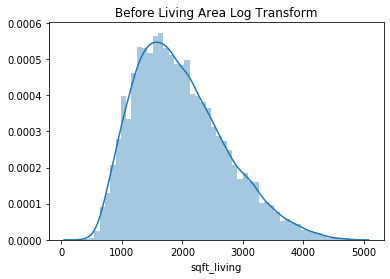

In [17]:
sns.distplot(transformed_df.sqft_living)
plt.title('Before Living Area Log Transform')

C:\Users\blake\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'After Living Area Log Transform')

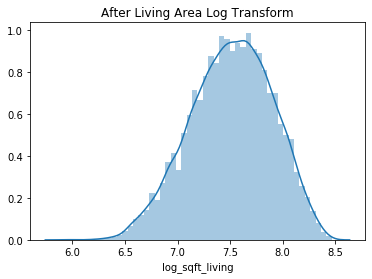

In [18]:
#create new column with log distributed values
transformed_df['log_sqft_living'] = np.log(df.sqft_living)

#check distribution of values
sns.distplot(transformed_df.log_sqft_living)
plt.title('After Living Area Log Transform')


### 2.3.5 Confirming Skewness and Kurtosis Values for Sqft_Living

In [19]:
#scipy.stats.skew
print('Raw Living Area Data Skewness: ',round(skew(df.sqft_living),3))
print('Before Living Area Log Transform Skewness: ',round(skew(transformed_df.sqft_living),3))
print('After Living Area Log Transform Skewness: ',round(skew(transformed_df.log_sqft_living),3))

Raw Living Area Data Skewness:  0.642
Before Living Area Log Transform Skewness:  0.642
After Living Area Log Transform Skewness:  -0.232


In [20]:
#scipy.stats.kurtosis
print('Raw Living Area Data Kurtosis: ',round(kurtosis(df.price),3))
print('Before Living Area Log Transform Kurtosis: ',round(kurtosis(transformed_df.sqft_living, fisher = True),3))
print('After Living Area Log Transform Kurtosis: ',round(kurtosis(transformed_df.log_sqft_living, fisher = True),3))

Raw Living Area Data Kurtosis:  2.474
Before Living Area Log Transform Kurtosis:  0.027
After Living Area Log Transform Kurtosis:  -0.354


**Kurtosis**
- Any distribution with **kurtosis ≈3 (excess kurtosis (Fisher) ≈0)** is called mesokurtic. This is a normal distribution
- Any distribution with **kurtosis <3 (excess kurtosis (Fisher) <0)** is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
- Any distribution with **kurtosis >3 (excess kurtosis (Fisher) >0)** is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.

***

**Skewness**
- If skewness is **less than −1 or greater than +1**, the distribution is highly skewed.
- If skewness is **between −1 and −½ or between +½ and +1**, the distribution is moderately skewed.
- If skewness is **between −½ and +½**, the distribution is approximately symmetric.

## 2.4 Categorical Data

#### Bedrooms not used

C:\Users\blake\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


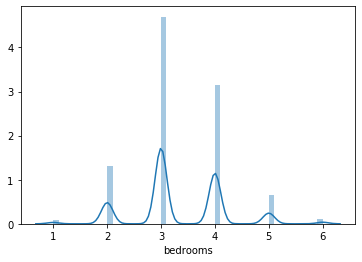

In [21]:
transformed_df['bedrooms'] = df['bedrooms']  

sns.distplot(transformed_df['bedrooms'])

Number of zipcodes in total:  70
----------------------------------------------------------------------------------------------------
98103    592
98115    579
98052    558
98117    547
98038    540
98042    524
98034    522
98118    491
98023    489
98133    489
Name: zipcode, dtype: int64


C:\Users\blake\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


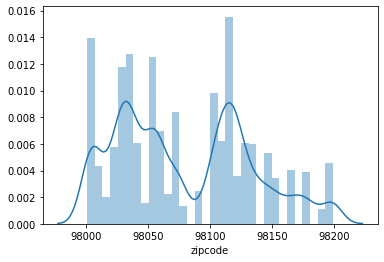

In [22]:
transformed_df['zipcode'] = df.zipcode

print('Number of zipcodes in total: ',len(transformed_df.zipcode.unique()))
print('-'*100)
print(transformed_df.zipcode.value_counts().sort_values(ascending=False)[:10])
sns.distplot(transformed_df.zipcode)

In [23]:
zipcode_df_mean = df.groupby('zipcode').mean().sort_values('price',ascending=False).round(2)
zipcode_df_std = df.groupby('zipcode').std().sort_values('price',ascending=False).round(2)
zipcode_df_count = df.groupby('zipcode').count().sort_values('price',ascending=False)

In [24]:
zipcode_df_std

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,log_price,log_sqft_living
zipcode,,,,,,,,,,,,,,,,
98112,320383.76,0.98,0.77,755.72,1768.20,0.52,0.0,0.71,1.02,642.20,395.04,38.48,607.31,1603.32,0.38,0.37
98105,299110.42,1.02,0.73,762.06,1979.15,0.52,0.0,0.74,0.98,609.69,389.80,30.84,553.17,1738.77,0.36,0.38
98109,296148.68,0.89,0.79,687.70,1577.06,0.59,0.0,0.73,0.94,493.20,388.47,39.34,445.35,1177.06,0.37,0.36
98004,290964.76,0.81,0.68,761.00,4847.63,0.51,0.0,0.60,1.09,684.02,475.16,19.47,579.11,4241.12,0.29,0.35
98102,282003.68,0.84,0.72,762.90,1928.63,0.55,0.0,0.61,0.99,570.05,355.31,44.04,494.07,1558.26,0.36,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98031,71036.66,0.64,0.51,517.95,13269.21,0.49,0.0,0.62,0.70,534.12,352.63,15.93,422.29,3770.02,0.22,0.27
98030,69485.53,0.70,0.54,558.12,5965.91,0.50,0.0,0.49,0.83,565.15,330.34,21.42,414.95,2971.15,0.24,0.29
98168,65344.52,0.92,0.59,530.77,7223.36,0.31,0.0,0.61,0.67,399.57,367.92,19.39,335.04,3425.18,0.29,0.37


In [25]:
zipcode_df_mean['price_std'] = zipcode_df_std['price']
zipcode_df_mean['counts'] = zipcode_df_count['price']
zipcode_df_mean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,log_price,log_sqft_living,price_std,counts
zipcode,,,,,,,,,,,,,,,,,,
98039,1220882.35,3.59,2.09,2298.24,13276.88,1.29,0.0,3.71,7.94,1902.94,395.29,1958.12,2607.06,14514.71,13.99,7.69,270831.97,17
98004,1001218.66,3.58,2.13,2272.59,11633.30,1.34,0.0,3.57,8.05,1906.64,365.95,1965.28,2460.32,11581.55,13.78,7.67,290964.76,220
98040,978682.33,3.88,2.46,2680.67,12658.14,1.44,0.0,3.83,8.64,2233.04,435.47,1969.10,2713.99,12105.85,13.76,7.85,269432.69,217
98112,888789.61,3.31,2.16,2147.55,4183.07,1.76,0.0,3.45,8.15,1739.93,401.35,1944.93,2062.75,4323.81,13.63,7.61,320383.76,222
98109,797632.11,3.14,2.07,1910.79,3465.70,1.67,0.0,3.45,7.86,1522.66,366.47,1943.25,1845.49,3477.84,13.52,7.49,296148.68,102


In [26]:
(zipcode_df_mean.counts).sort_values(ascending=True)

zipcode
98039     17
98024     47
98148     55
98070     60
98010     80
        ... 
98038    540
98117    547
98052    558
98115    579
98103    592
Name: counts, Length: 70, dtype: int64

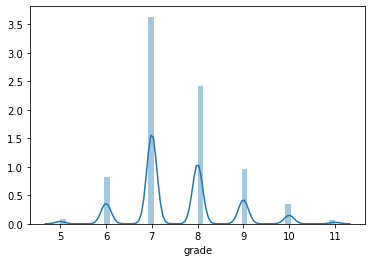

In [29]:
sns.distplot(df.grade)

In [30]:
df.waterfront.value_counts()
#transformed_df.waterfront.value_counts()

0.0    20110
Name: waterfront, dtype: int64

In [31]:
transformed_df = pd.get_dummies(transformed_df, columns=['zipcode'], drop_first=True)

In [32]:
transformed_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'sqft_living15', 'sqft_lot15', 'log_price',
       'log_sqft_living', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_

In [33]:
columns_to_be_dropped = ['price','sqft_living','bathrooms','bedrooms','sqft_lot','floors','condition','grade','sqft_living15','sqft_lot15','sqft_above',
                         'sqft_basement','yr_built','waterfront']
final_df = transformed_df.drop(columns=columns_to_be_dropped)

In [35]:
#columns that remain
display(final_df.columns)

Index(['log_price', 'log_sqft_living', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zi

## 2.5 Check for Multicolinearality

In [36]:
# the VIFdoes expect a constant term in the data, so we need to add one using the add_constant method
x_1 = sm.tools.add_constant(final_df.drop(columns='log_price'))
#X2 = sm.tools.add_constant(df_iter_1)

# create the series for both
vif_check_df = pd.Series([variance_inflation_factor(x_1.values, i) for i in range(x_1.shape[1])], index=x_1.columns)

# display the series to find vaues greater than 5
display(vif_check_df.round(2).loc[vif_check_df > 5])

const    501.87
dtype: float64

# Step 3 Save Final_Df to be used in Linreg Model

In [37]:
final_df.to_csv('../CSV Files/linreg_ready_data.csv',index=False)

In [38]:
final_df.shape

(20110, 71)